About 1-2% of the general population suffers from epilepsy:

Just in the US, it's more than 3 Millions patients.

Causes can vary among patients - for some, it's brain tumor, for some others, it's injuries and concussions.
Because these things have been happening to humans, this condition is known for thousands of years.


Historical figures and even athletes experienced this condition:
https://en.wikipedia.org/wiki/List_of_people_with_epilepsy .
The first recorded medication against seizures started in ancient Greece, around 500 BC: https://pubmed.ncbi.nlm.nih.gov/19049574/ and later became known as the ketogenic diet.

For a long time, there was very little treatment available, people with epilepsy were not allowed to get married, and many other things (which may be the reason why we have more historical data about epilepsy among men than women).

Today, for most patients with epilepsy, the expected efficiency of a medication is about 60%.
Even if a medication does work, it often has side effects, such as fatigue, or low levels of other nutrients or hormones.

Because this medical problem is such a taboo, it can be hard to have historical data on it.

Luckily, in 2020, we have brilliant people (http://tatonettilab.org/resources/nsides/ ) who prepared a wonderful dataset and made it available to the public.
This analysis will combine this dataset and knowledge about epilepsy to suggest further improvement for epilepsy patients (and maybe also some savings for medicare or medicaid).

In [1]:
import numpy as np
import pandas as pd

This analysis will look at how we could reduce the number of seizures that people are experiencing (with the medications that we currently have on the market), and how to minimize the side-effects of medications that are needed to prevent seizures.

Indirectly, this would imply medicare or medicaid savings, and reduce number of people in ER.

So, let's see:

# 1. Which medications cause non-epileptic patients have seizures?

In [2]:
# dataset with drug side effects
df = pd.read_csv('OFFSIDES.csv', low_memory=False)

In [3]:
# we only select the subset that describes seizure-related condition
df_seizure_like_conditions = df[df['condition_concept_name'].str.contains("seizure|aura|syncope|epilepsy|epileptic|convulsion")]

In [4]:
df_seizure_like_conditions[['PRR']] = df_seizure_like_conditions[['PRR']].astype(float)
df_seizure_like_conditions[['A', 'B', 'C', 'D']] = df_seizure_like_conditions[['A', 'B', 'C', 'D']].astype(int)
df_seizure_like_conditions = df_seizure_like_conditions.sort_values(by='PRR', ascending=False)
df_seizure_like_conditions.to_csv('df_seizure_like_conditions.csv')

/Users/ninakuklisova/miniconda2/envs/python38/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Which medications were used here?

In [5]:
meds = df_seizure_like_conditions['drug_concept_name'].drop_duplicates().to_list()

In [8]:
meds

['ASPARAGINASE',
 'Corticotropin',
 'imiglucerase',
 'palivizumab',
 'Phenytoin',
 'Citalopram',
 'Mesna',
 'Pimecrolimus',
 'ferumoxytol',
 'rufinamide',
 'Tiaprofenate',
 'Nitrazepam',
 'Vitamin B6',
 'Fenofibrate',
 'dalfampridine',
 'ropivacaine',
 'Ethosuximide',
 'Brompheniramine',
 'oxitropium',
 'alitretinoin',
 'nabilone',
 'prednisolone',
 'mercaptopurine',
 'Canrenoate',
 'Ribavirin',
 'Hydroxychloroquine',
 'Cytarabine liposome',
 'ertapenem',
 'Amisulpride',
 'Acetaminophen',
 'Penicillin',
 'Primidone',
 'Perhexiline',
 'Clomipramine',
 'felbamate',
 'Minocycline',
 'Propofol',
 'Mianserin',
 'Tranexamic Acid',
 'Theophylline',
 'Nitrous Oxide',
 'rofecoxib',
 'Pyrimethamine',
 'Acitretin',
 'Bupivacaine liposome',
 'Spiramycin',
 'Ondansetron',
 'Estrogens, Esterified (USP)',
 'dexlansoprazole',
 'temozolomide',
 'ado-trastuzumab emtansine',
 'pegaspargase',
 'paliperidone',
 'Finasteride',
 'Miglustat',
 'Bendroflumethiazide',
 'Nitrendipine',
 'Nefopam',
 'dexmethylphe

In [9]:
len(meds)

1515

We see there are lots of meds that people with seizures have been taking.

One of them is even 'Placebo'.

Also, there are many other vitamins and oils.

For vitamins, this may be an indication that the epilepsy patient, treated with anti-seizure medications,
has had symptoms that could indicate low leveles of the given vitamin (and of some hormone?). Yet, a vitamin itself is very unlikely to cause seizures - otherwise, more than 2% of the general population would be experiencing seizures.

For certain oils, this may also be a supplement, a placebo, or they may have started the ketogenic diet.

Also, as we see from the list of medications: there are cases where people have seizures from street drugs, such as heroin.
So, we need to exclude 'Alcoholic seizure', 'Drug withdrawal convulsions', etc.

In addition, some people have seizure-like symptoms from low sugar level or diabetes.
So, we exclude 'Hypoglycaemic seizure'.

In [10]:
# to prevent problems with uppercase or lowercase medication names,
# we set all names to lowercase

df_seizure_like_conditions['drug_concept_name'] = df_seizure_like_conditions['drug_concept_name'].str.lower()

df_seizure_like_conditions.to_csv('df_seizure_like_conditions.csv')

df_seizure_like_conditions.describe()

,A,B,C,D,PRR
count,10584.000000,10584.000000,10584.000000,1.058400e+04,10584.000000
mean,9.939059,20370.517479,87.364040,2.037172e+05,2.750455
std,32.140089,29986.393960,254.873943,2.998494e+05,4.516060
min,1.000000,0.000000,1.000000,0.000000e+00,0.102564
25%,1.000000,2180.000000,6.000000,2.180950e+04,0.769231
50%,2.000000,7867.500000,20.000000,7.869800e+04,1.412890
75%,6.000000,25857.000000,61.000000,2.585270e+05,2.857140
max,754.000000,236703.000000,4849.000000,2.367031e+06,170.000000


In [11]:
# we drop all rows where the patient is taking a vitamin:
# there is about 100 of these rows
# everyone needs to be exposed to vitamins through their diet to some extent
# if they were causing seizures, it wouldn't be just 2% of the general population
df_seizure_like_conditions = df_seizure_like_conditions[ df_seizure_like_conditions['drug_concept_name'].str.contains("vitamin") == False]

# similar for oils, our diet contains a certain quantity of oils
df_seizure_like_conditions = df_seizure_like_conditions[ df_seizure_like_conditions['drug_concept_name'].str.contains("oil") == False]

# also, other popular dietary supplements are folic acid and omega-3 fatty acids
df_seizure_like_conditions = df_seizure_like_conditions[ df_seizure_like_conditions['drug_concept_name'].str.contains("acid") == False]

# also, if anti-vaxers forgive us, we will exclude records about vaccines
df_seizure_like_conditions = df_seizure_like_conditions[ df_seizure_like_conditions['drug_concept_name'].str.contains("vaccine") == False]


df_seizure_like_conditions.to_csv('df_seizure_like_conditions.csv')

df_seizure_like_conditions.describe()

,A,B,C,D,PRR
count,10340.000000,10340.000000,10340.000000,1.034000e+04,10340.000000
mean,10.010735,20448.957060,87.654352,2.045020e+05,2.740580
std,32.398518,30151.160898,255.814856,3.014973e+05,4.507869
min,1.000000,3.000000,1.000000,3.500000e+01,0.102564
25%,1.000000,2181.000000,6.000000,2.181975e+04,0.769231
50%,2.000000,7886.500000,20.000000,7.889300e+04,1.412890
75%,6.000000,25869.000000,61.000000,2.586390e+05,2.857140
max,754.000000,236703.000000,4849.000000,2.367031e+06,170.000000


In [12]:
# now, we drop the rows with record of seizures caused by other substances or low or high sugar levels
df_seizure_like_conditions['condition_concept_name'] = df_seizure_like_conditions['condition_concept_name'].str.lower()

df_seizure_like_conditions = df_seizure_like_conditions[ df_seizure_like_conditions['condition_concept_name'].str.contains("alcoholic") == False]
df_seizure_like_conditions = df_seizure_like_conditions[ df_seizure_like_conditions['condition_concept_name'].str.contains("withdrawal") == False]

df_seizure_like_conditions = df_seizure_like_conditions[ df_seizure_like_conditions['condition_concept_name'].str.contains("hypoglycaemic") == False]
df_seizure_like_conditions = df_seizure_like_conditions[ df_seizure_like_conditions['condition_concept_name'].str.contains("hyperglycaemic") == False]

df_seizure_like_conditions.to_csv('df_seizure_like_conditions.csv')

df_seizure_like_conditions.describe()

,A,B,C,D,PRR
count,9743.000000,9743.000000,9743.000000,9.743000e+03,9743.000000
mean,10.362722,19786.369599,91.190393,1.978761e+05,2.710464
std,33.249716,29786.164713,262.875624,2.978468e+05,4.535621
min,1.000000,3.000000,1.000000,3.500000e+01,0.102564
25%,1.000000,2096.000000,6.000000,2.096200e+04,0.769231
50%,2.000000,7429.000000,21.000000,7.429200e+04,1.388890
75%,7.000000,24558.000000,63.000000,2.456970e+05,2.857140
max,754.000000,236703.000000,4849.000000,2.367031e+06,170.000000


Now, we excluded most popular dietary supplements from our dataset, and we excluded seizures caused by abuse of drugs that were not prescribed or abnormal blood sugar levels.

In [13]:
# first, we create a list of medications that are intended to treat epilepsy (prescribed by neurologists)
# https://www.healthline.com/health/epilepsy/medications-list#narrowspectrum-aeds
# https://www.drugs.com/condition/epilepsy.html

# note: medications have official and generic name, so we include both
# also, to avoid usual data quality issues: make everything in the list lowercase

epilepsy_meds = ['carbamazepine', 'carbatrol',  'tegretol', 'epitol', 'equetro', 'clobazam', 'onfi',
                 'diazepam', 'valium', 'diastat', 'divalproex', 'depakote', 'eslicarbazepine', 'eslicarbazepine acetate', 'aptiom',
                'ethosuximide', 'zarontin', 'gabapentin', 'neurontin', 'gralise', 'lacosamide', 'vimpat', 'methsuximide', 'celontin',
                'oxcarbazepine', 'trileptal', 'oxtellar XR', 'perampanel', 'fycompa', 'phenobarbital', 
                'phenytoin', 'dilantin', 'phenytek', 'pregabalin', 'lyrica', 'rufinamide', 'banzel', 
                'tiagabine hydrochloride',  'gabitril', 'vigabatrin', 'sabril'
                'clonazepam', 'klonopin', 'clorazepate', 'tranxene-T', 'ezogabine', 'potiga', 'felbamate', 'felbatol',
                'lamotrigine', 'lamictal', 'levetiracetam', 'keppra', 'spritam', 'lorazepam', 'ativan', 
                'primidone', 'mysoline', 'topiramate', 'topamax', 'qudexy XR', 'trokendi XR', 
                'valproic acid', 'depacon', 'depakene', 'depakote', 'stavzor', 'zonisamide', 'zonegran']

In [14]:
len(epilepsy_meds)

68

Even for those who haven't encountered people with seizures - based on the length of this list,
it is clear that this problem does affect a lot of people, and that it isn't that simple to find a treatment that works for every patient!

In [20]:
# we split the dataframe in 2 parts:
# seizure-like side effects of medications intended to treat other conditions
df_seizure_offside = df_seizure_like_conditions[~df_seizure_like_conditions['drug_concept_name'].isin(epilepsy_meds)]
df_seizure_offside.to_csv('df_seizure_offside.csv')

df_seizure_offside.describe()

# epilepsy patients taking anticonvulsants - this table will be used later to evaluate anticonvulsants' efficiency
df_anticonvulsants = df_seizure_like_conditions[df_seizure_like_conditions['drug_concept_name'].isin(epilepsy_meds)]
df_anticonvulsants.to_csv('df_anticonvulsants.csv')

df_anticonvulsants.describe()

,A,B,C,D,PRR
count,465.000000,465.000000,465.000000,465.000000,465.000000
mean,34.092473,24033.230108,152.984946,240520.240860,4.255439
std,83.987979,24818.265685,367.367554,248172.162668,5.950454
min,1.000000,33.000000,1.000000,339.000000,0.113636
25%,2.000000,4422.000000,8.000000,44377.000000,1.304350
50%,7.000000,10762.000000,33.000000,107628.000000,2.500000
75%,23.000000,38743.000000,99.000000,387436.000000,4.833330
max,754.000000,74254.000000,2931.000000,742539.000000,70.000000


In [21]:
# so, what are top 20 medications that cause seizure-like effects?
df_seizure_offside = df_seizure_offside.sort_values(by = 'PRR')
df_seizure_offside.reset_index(drop=True, inplace=True)
df_seizure_offside = df_seizure_offside.drop_duplicates()
df_seizure_offside.head(20)

,drug_rxnorn_id,drug_concept_name,condition_meddra_id,condition_concept_name,A,B,C,D,PRR,PRR_error,mean_reporting_frequency
0,6813,methadone,10041962,status epilepticus,2,17676,195,176585,0.102564,0.71068,0.000113135
1,342369,lenalidomide,10043994,tonic convulsion,1,64874,97,648653,0.103093,1.00513,1.54143e-05
2,253337,bevacizumab,10034759,petit mal epilepsy,1,39447,97,394383,0.103093,1.00513,2.53498e-05
4,327361,adalimumab,10010145,complex partial seizures,3,181053,289,1810271,0.103806,0.580334,1.65695e-05
5,75917,interferon beta-1a,10053398,clonic convulsion,1,125225,96,1252164,0.104167,1.00519,7.98556e-06
6,60548,exenatide,10041962,status epilepticus,2,47832,192,478148,0.104167,0.710764,4.18113e-05
7,51272,quetiapine,10063894,sudden unexplained death in epilepsy,1,67672,95,676635,0.105263,1.00524,1.47769e-05
9,60548,exenatide,10061334,partial seizures,1,47833,95,478245,0.105263,1.00524,2.09056e-05
10,232158,rofecoxib,10036653,presyncope,8,42286,756,422184,0.105820,0.355383,0.000189152
11,6373,levonorgestrel,10041962,status epilepticus,4,87652,377,876183,0.106101,0.502633,4.56329e-05


In [22]:
# we can also sort these by mean reporting frequency
df_seizure_offside['mean_reporting_frequency'] = df_seizure_offside['mean_reporting_frequency'].astype(float)
df_seizure_offside = df_seizure_offside.sort_values(by = 'mean_reporting_frequency')
df_seizure_offside = df_seizure_offside.drop_duplicates()
# we can highlight the problematic meds
# df_seizure_offside = df_seizure_offside.style.apply(lambda x: ['background-color: yellow' for i in x], subset=['drug_concept_name'])
df_seizure_offside.head(20)

,drug_rxnorn_id,drug_concept_name,condition_meddra_id,condition_concept_name,A,B,C,D,PRR,PRR_error,mean_reporting_frequency
3868,214555,etanercept,10018090,generalised non-convulsive epilepsy,1,236703,9,2367031,1.111110,1.05409,0.000004
979,214555,etanercept,10052787,migraine without aura,1,236703,22,2367018,0.454545,1.02247,0.000004
51,214555,etanercept,10003628,atonic seizures,1,236703,74,2366966,0.135135,1.00673,0.000004
1709,214555,etanercept,10015049,epileptic aura,1,236703,16,2367024,0.625000,1.03077,0.000004
8163,1191,aspirin,10071081,idiopathic generalised epilepsy,1,204803,2,2048038,5.000000,1.22474,0.000005
6068,1191,aspirin,10018090,generalised non-convulsive epilepsy,1,204803,5,2048035,2.000000,1.09544,0.000005
203,1191,aspirin,10015049,epileptic aura,1,204803,45,2047995,0.222222,1.01105,0.000005
559,327361,adalimumab,10052787,migraine without aura,1,181055,29,1810531,0.344828,1.01709,0.000006
2474,327361,adalimumab,10070530,benign rolandic epilepsy,1,181055,13,1810547,0.769231,1.03775,0.000006
3017,327361,adalimumab,10071669,typical aura without headache,1,181055,11,1810549,0.909091,1.04446,0.000006


Among these potentially seizure-causing drugs, we see many that are used to treat cancer. 
Patients taking these drugs should be inpatient in case this happens to them.

Also, we see a drug used to treat schizophrenia and bipolar disorder (quetiapine) resulting in Sudden Unexplained Death in Epilepsy.
This is a warning for many doctors: people who have epilepsy may appear extremely confused and speak random nonsenze (after their seizures), but the real problem to treat is epilepsy, not the confused words.

# 2. Which anticonvulsants are the most and least efficient?

In [23]:
# note: this is purely informative - this dataset doesn't tell us the drug dosage;
# sometimes, a patient has occassional seizures when they take X mg of some medication,
# but increasing the dosage to 2X can be enough to stop seizures.

First, let's just check which anticonvulsants are the most popular ones (in this dataset).

In this dataset, column A says how many people exposed to the drug had this outcome, and column B says how many people exposed to the drug didn't have that outcome. (C and D count outcome occurrence among people who weren't exposed to the drug.)
So, the total number of people exposed to the drug is A + B.

Because people can have similar symptoms described with the different words, we have many rows in this dataset.

So, we process all of them to see how many people in this dataset were taking this medication.

In [26]:
df_anticonvulsants['Taking_count'] = df_anticonvulsants.apply(lambda x: x['A'] + x['B'], axis=1)

<ipython-input-26-a2dc43d645d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anticonvulsants['Taking_count'] = df_anticonvulsants.apply(lambda x: x['A'] + x['B'], axis=1)


In [27]:
# we see that Taking_count is mostly the same for the same medication (which makes sense)

df_aed_popularity = df_anticonvulsants[['drug_concept_name', 'Taking_count']]
df_aed_popularity.to_csv('df_aed_popularity.csv')

In [28]:
df_aed_popularity = df_aed_popularity.groupby(['drug_concept_name']).mean()
df_aed_popularity.to_csv('df_aed_popularity.csv')

Now, to visualize what are the most popular medications in this dataset:

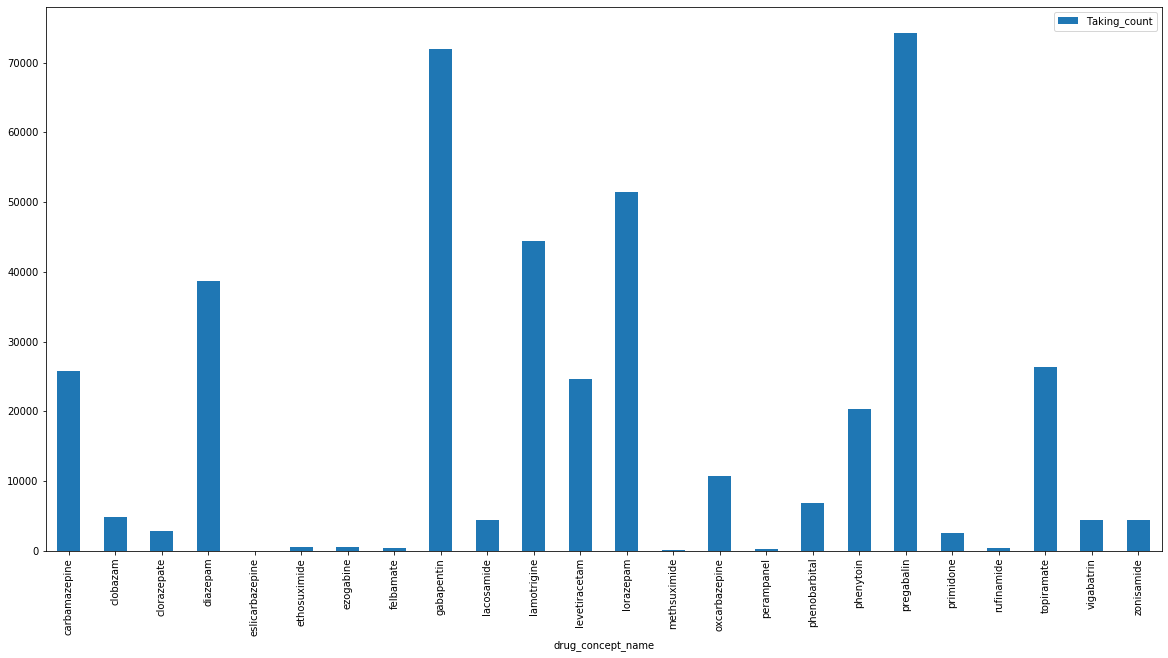

In [29]:
ax = df_aed_popularity.plot.bar(y='Taking_count', rot=90, figsize=(20,10))

ax.plot(figsize=(20,10));
ax.figure.savefig('meds.pdf')

As we can see, Gabapentin and Pregabalin are the commonly prescribed drugs in this dataset.

In [30]:
# still, as mentioned earlier, we don't know what quantity of these medications are these patients taking,
# and if they are taking only one AED, or multiple.
# this dataset was not focused on patients with epilepsy,
# but it does show that lots of people do have this problem,
# and there could be different medications working better for different people.

In [31]:
# now, we go back to evaluating efficiency of medications
df_anticonvulsants = df_anticonvulsants.sort_values(by = 'PRR')
df_anticonvulsants.reset_index(drop=True, inplace=True)
df_anticonvulsants = df_anticonvulsants.drop_duplicates()
df_anticonvulsants.head(20)

,drug_rxnorn_id,drug_concept_name,condition_meddra_id,condition_concept_name,A,B,C,D,PRR,PRR_error,mean_reporting_frequency,Taking_count
0,187832,pregabalin,10016284,febrile convulsion,1,74254,88,742462,0.113636,1.00566,1.34671e-05,74255
1,28439,lamotrigine,10027607,migraine with aura,1,44394,69,443881,0.144928,1.00721,2.25251e-05,44395
2,25480,gabapentin,10063894,sudden unexplained death in epilepsy,2,71972,76,719664,0.263158,0.71634,2.77878e-05,71974
4,187832,pregabalin,10043994,tonic convulsion,3,74252,107,742443,0.280374,0.585375,4.04013e-05,74255
5,2353,clorazepate,10034759,petit mal epilepsy,1,2887,32,28848,0.312500,1.01532,0.00034626,2888
6,25480,gabapentin,10016284,febrile convulsion,2,71972,62,719678,0.322581,0.718411,2.77878e-05,71974
8,25480,gabapentin,10043209,temporal lobe epilepsy,2,71972,57,719683,0.350877,0.719395,2.77878e-05,71974
10,69036,rufinamide,10034759,petit mal epilepsy,1,399,27,3973,0.370370,1.017,0.0025,400
11,6470,lorazepam,10063894,sudden unexplained death in epilepsy,2,51385,53,513817,0.377358,0.72031,3.89203e-05,51387
12,187832,pregabalin,10053398,clonic convulsion,4,74251,90,742460,0.444444,0.510976,5.38684e-05,74255


In [32]:
# we can also sort these by mean reporting frequency
df_anticonvulsants['mean_reporting_frequency'] = df_anticonvulsants['mean_reporting_frequency'].astype(float)
df_anticonvulsants = df_anticonvulsants.sort_values(by = 'mean_reporting_frequency')
df_anticonvulsants = df_anticonvulsants.drop_duplicates()
df_anticonvulsants.head(20)

,drug_rxnorn_id,drug_concept_name,condition_meddra_id,condition_concept_name,A,B,C,D,PRR,PRR_error,mean_reporting_frequency,Taking_count
0,187832,pregabalin,10016284,febrile convulsion,1,74254,88,742462,0.113636,1.00566,0.000013,74255
355,25480,gabapentin,10072456,hypocalcaemic seizure,1,71973,2,719738,5.000000,1.22474,0.000014,71974
66,25480,gabapentin,10037214,psychomotor seizures,1,71973,11,719729,0.909091,1.04446,0.000014,71974
49,25480,gabapentin,10049424,frontal lobe epilepsy,1,71973,12,719728,0.833333,1.04083,0.000014,71974
359,6470,lorazepam,10071545,early infantile epileptic encephalopathy with ...,1,51386,2,513868,5.000000,1.22474,0.000019,51387
354,6470,lorazepam,10003831,automatism epileptic,1,51386,2,513868,5.000000,1.22474,0.000019,51387
1,28439,lamotrigine,10027607,migraine with aura,1,44394,69,443881,0.144928,1.00721,0.000023,44395
240,28439,lamotrigine,10071081,idiopathic generalised epilepsy,1,44394,4,443946,2.500000,1.11802,0.000023,44395
237,28439,lamotrigine,10056699,atypical benign partial epilepsy,1,44394,4,443946,2.500000,1.11802,0.000023,44395
423,3322,diazepam,10037214,psychomotor seizures,1,38743,1,387439,10.000000,1.4142,0.000026,38744


Gabapentin seems to have fewer incidences of seizure-like symptoms than other anticonvulsants, but, as mentioned earlier, this dataset doesn't indicate what was the dosage.

In [33]:
df_anticonvulsants = df_anticonvulsants.sort_values(by = 'PRR', ascending = False)
df_anticonvulsants.reset_index(drop=True, inplace=True)
df_anticonvulsants = df_anticonvulsants.drop_duplicates()
df_anticonvulsants.head(20)

,drug_rxnorn_id,drug_concept_name,condition_meddra_id,condition_concept_name,A,B,C,D,PRR,PRR_error,mean_reporting_frequency,Taking_count
0,8183,phenytoin,10036312,post-traumatic epilepsy,7,20386,1,203929,70.0000,1.06902,0.000343,20393
1,69036,rufinamide,10003628,atonic seizures,9,391,2,3998,45.0000,0.779975,0.022500,400
2,8691,primidone,10015049,epileptic aura,6,2507,2,25128,30.0000,0.816229,0.002388,2513
3,24812,felbamate,10003628,atonic seizures,6,413,2,4188,30.0000,0.814887,0.014320,419
4,4135,ethosuximide,10003628,atonic seizures,6,497,2,5028,30.0000,0.815156,0.011928,503
5,32624,oxcarbazepine,10003831,automatism epileptic,2,10761,1,107629,20.0000,1.2247,0.000186,10763
6,24812,felbamate,10054859,myoclonic epilepsy,2,417,1,4189,20.0000,1.22367,0.004773,419
7,8134,phenobarbital,10037214,psychomotor seizures,2,6867,1,68689,20.0000,1.22468,0.000291,6869
8,1482502,eslicarbazepine,10018100,generalised tonic-clonic seizure,2,33,1,349,20.0000,1.21185,0.057143,35
9,32624,oxcarbazepine,10049424,frontal lobe epilepsy,4,10759,2,107628,20.0000,0.865966,0.000372,10763


In [34]:
# again, we compare these by mean reporting frequency
df_anticonvulsants['mean_reporting_frequency'] = df_anticonvulsants['mean_reporting_frequency'].astype(float)
df_anticonvulsants = df_anticonvulsants.sort_values(by = 'mean_reporting_frequency', ascending = False)
df_anticonvulsants = df_anticonvulsants.drop_duplicates()
# again, we can add some style, if we have memory available for a Styler object
#df_anticonvulsants.style.apply(lambda x: ['background-color: yellow' for i in x], subset=['drug_concept_name'])
df_anticonvulsants.head(30)

,drug_rxnorn_id,drug_concept_name,condition_meddra_id,condition_concept_name,A,B,C,D,PRR,PRR_error,mean_reporting_frequency,Taking_count
16,4135,ethosuximide,10034759,petit mal epilepsy,44,459,26,5004,16.92310,0.242903,0.087475,503
61,1356552,perampanel,10041962,status epilepticus,23,271,32,2908,7.18750,0.266433,0.078231,294
121,69036,rufinamide,10041962,status epilepticus,24,376,60,3940,4.00000,0.235761,0.060000,400
263,1482502,eslicarbazepine,10018659,grand mal convulsion,2,33,11,339,1.81818,0.747984,0.057143,35
31,1482502,eslicarbazepine,10041962,status epilepticus,2,33,2,348,10.00000,0.98416,0.057143,35
8,1482502,eslicarbazepine,10018100,generalised tonic-clonic seizure,2,33,1,349,20.00000,1.21185,0.057143,35
178,4135,ethosuximide,10018659,grand mal convulsion,22,481,69,4961,3.18841,0.240334,0.043738,503
140,623400,lacosamide,10018659,grand mal convulsion,194,4262,535,44025,3.62617,0.0823222,0.043537,4456
73,623400,lacosamide,10041962,status epilepticus,173,4283,278,44282,6.22302,0.0955542,0.038824,4456
231,24812,felbamate,10018659,grand mal convulsion,16,403,72,4118,2.22222,0.271595,0.038186,419


Ethosuximide, which is used to treat absence seizures, seems to not work for some patients:
Yet, as mentioned earlier, maybe the patients just needed higher doses.

Eslicarbazepine (Aptiom) seems to be the least efficient medication here.

There are reasons why it could be so: it causes low levels of sodium for many people,
and, as we've seen in one of the tables above, some seizures can also be caused by low sodium levels.

In addition, if the dosage is increased, patient's sodium levels can get even lower.

It is a relatively new medication, and many insurance plans don't cover it. If they see this analysis, chances are they still wouldn't cover it.

# 3. Which side effects are hormonal?

First, let's define hormonal side effects.

Hormonal side effects are caused by abnormal levels of certain hormones.

Many experienced endocrinologists know that some anticonvulsants cause low levels of hormones.
Some studies have been done on this subject as well:
 - https://pubmed.ncbi.nlm.nih.gov/3925547/
 - https://pubmed.ncbi.nlm.nih.gov/25797888/
 - https://pubmed.ncbi.nlm.nih.gov/569688/

Measuring hormone levels is not a part of the basic tests that patients get done when they see a doctor, so, very often, this problem can go unrecorded for a long time.

In addition, many seizures affect children, and children are not expected to have the same hormone levels as adults.

## Fatigue, sleepiness, or strange mood swings are accepted as unavoidable side effects of anticonvulsants. For some adult epilepsy patients, they may even be a reason why they are hesitant to take the medications. Yet, this problems may be solved by helping patients get their hormones back in balance.

This dataset was not designed primarily to investigate this problem, but we can use it to shed some light on this question.

We have:
- supplements that patients with seizures are taking (probably had low levels in the past):
    vitamins, folic acid, estrogen, progesterone, testosterone
- side effects that patients taking anticonvulsant medications are experiencing.


In [35]:
# first, we check how many of the epilepsy patients also taking these supplements

# filter from the initial big dataset, but only taking these 

df_seizure_hormone_like_conditions = df[df['condition_concept_name'].str.contains("seizure|aura|syncope|epilepsy|convulsion")]
df_seizure_hormone_like_conditions[['A', 'B', 'C', 'D']] = df_seizure_hormone_like_conditions[['A', 'B', 'C', 'D']].astype(int)
df_seizure_hormone_like_conditions['condition_concept_name'] = df_seizure_hormone_like_conditions['condition_concept_name'].str.lower()
df_seizure_hormone_like_conditions['drug_concept_name'] = df_seizure_hormone_like_conditions['drug_concept_name'].str.lower()

# again, we exclude seizures caused by unprescribed drugs or abnormal sugar levels
df_seizure_hormone_like_conditions = df_seizure_hormone_like_conditions[df_seizure_hormone_like_conditions['condition_concept_name'].str.contains("alcoholic|withdrawal|hypoglycaemic|hyperglycaemic") == False]

df_seizure_hormone_like_conditions.to_csv('df_seizure_hormone_like_conditions.csv')

/Users/ninakuklisova/miniconda2/envs/python38/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-35-89a2f2638c80>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seizure_hormone_like_conditions['condition_concept_name'] = df_seizure_hormone_like_conditions['condition_concept_name'].str.lower()
<ipython-input-35-89a2f2638c80>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [36]:
# we just check how many patients with seizures take these supplements

df_seizure_med_supplements= df_seizure_hormone_like_conditions[ df_seizure_hormone_like_conditions['drug_concept_name'].str.contains("estrogen|progesterone|testosterone|vitamin|folate|folic|calcium")]
df_seizure_med_supplements.to_csv('df_seizure_med_supplements.csv')

df_seizure_med_supplements.describe()

,A,B,C,D
count,272.000000,272.000000,272.000000,272.000000
mean,8.558824,23025.691176,94.713235,230247.786765
std,19.052758,18828.911286,221.061709,188265.883585
min,1.000000,159.000000,1.000000,1609.000000
25%,1.000000,4569.500000,7.000000,45659.500000
50%,2.000000,24926.000000,22.000000,249339.000000
75%,6.250000,34308.500000,72.750000,343097.750000
max,169.000000,65402.000000,1988.000000,654025.000000


In [37]:
# this seems to be a lot of people taking these supplements.

# let's group this dataframe by medication name, to see which ones are most prevalent.
df_seizure_med_supplements['Taking_count'] = df_seizure_med_supplements.apply(lambda x: x['A'] + x['B'], axis=1)

df_seizure_med_supplements = df_seizure_med_supplements.groupby(['drug_concept_name']).mean()

<ipython-input-37-0bd9e6364d19>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seizure_med_supplements['Taking_count'] = df_seizure_med_supplements.apply(lambda x: x['A'] + x['B'], axis=1)


In [38]:
df_seizure_med_supplements.to_csv('df_seizure_med_supplements.csv')

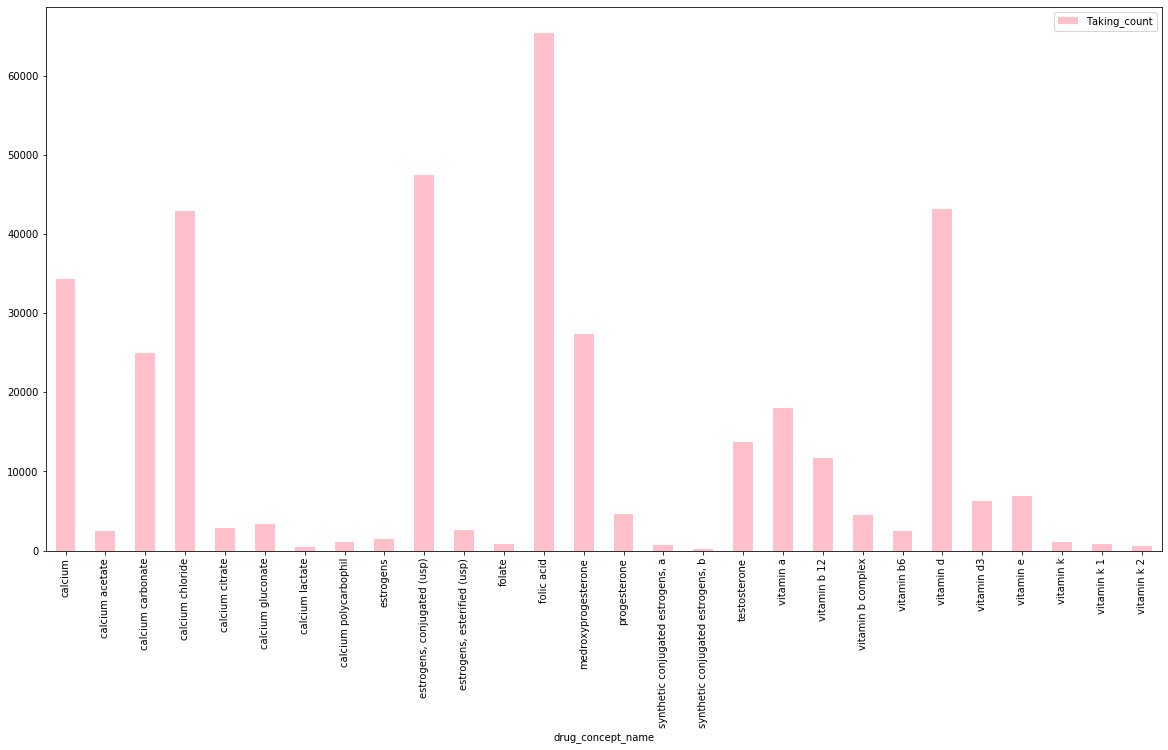

In [39]:
# as before, let's see how common it is among people with seizures to take supplements:
bx = df_seizure_med_supplements.plot.bar(y='Taking_count', rot=90, figsize=(20,10), color = "pink")

bx.plot(figsize=(20,10));

bx.figure.savefig('supplements.pdf')

This shows us that the most common deficiencies among patients with seizures are folic acid, calcium in various forms, and estrogens / progesterone and vitamin D.

These hormones are particularly important for regulating blood levels of vitamin D and calcium among female patients,
so it is not surprising that we find that many epilepsy patients who happen to be female need these supplements.

There has been other research done on this, with findings that female patients can end up overmedicated (in general):
https://bsd.biomedcentral.com/articles/10.1186/s13293-020-00308-5

With our current level of knowledge, we can see that we could improve monitoring hormonal levels of patients taking 
anticonvulsants, to reduce the number of medications that female patients have to take.

In addition - since anticonvulsants have similar action on our nervous system as alcohol does, and different populations metabolize alcohol in a different way, this could also be taken into account during anticonvulsant drug trials.


In [40]:
# if patients have low levels of certain hormones (estrogen / progesterone / testosterone), 
# they can be prescribed calcium in some form
# so, we look at incidence of these among the patients

# vitamin b6 is often used to boost progesterone levels
# Also, patients taking anticonvulsants often have low blood levels of vitamin b12 and folate:
# “Antiepileptic drugs interact with folate and vitamin B12 serum levels”, Annals of Neurology, n/a. doi: 10.1002/ana.22229 (this article was made online before it was actually published, although it has already been approved to be published)
# http://onlinelibrary.wiley.com.proxy.uchicago.edu/doi/10.1002/ana.22229/full
# http://onlinelibrary.wiley.com.proxy.uchicago.edu/doi/10.1002/ana.22229/pdf

# again, this is purely for informative - we don't know which medical test lead the patient's doctor to 
# prescribing that supplement
# also, we don't know how long and how much they have been taking the anticonvulsant
# all we can say is that there is indication that these epilepsy patients had this problem
# last, but not least, the sample of patients in this dataset may not be perfectly 
# representative of the general population



In [41]:
# second, we check how many of the patients taking anticonvulsants are experiencing symptoms
# that are common accepted side effects of anticonvulsants,
# but may be resolved by recovering their missing hormones
# common examples are dizziness, fatigue, dry eyes, etc.

df_anticonvulsant_side_effects = df[df['drug_concept_name'].isin(epilepsy_meds)]

# exclude the seizures themselves - these anticonvulsants are primarily taken against them,
# and we already estimated their efficiency in the earlier section.

seizure_terms = df_anticonvulsants['condition_concept_name'].drop_duplicates().to_list()
print(seizure_terms)
df_anticonvulsant_side_effects['condition_concept_name'] = df_anticonvulsant_side_effects['condition_concept_name'].str.lower()
df_anticonvulsant_side_effects = df_anticonvulsant_side_effects[df_anticonvulsant_side_effects['condition_concept_name'].str.contains("seizure|aura|syncope|epilepsy|convulsion|status epilepticus") == False]

df_anticonvulsant_side_effects.to_csv('df_anticonvulsant_side_effects.csv')                                            

['petit mal epilepsy', 'status epilepticus', 'grand mal convulsion', 'generalised tonic-clonic seizure', 'atonic seizures', 'sudden unexplained death in epilepsy', 'partial seizures', 'complex partial seizures', 'myoclonic epilepsy', 'tonic convulsion', 'simple partial seizures', 'presyncope', 'clonic convulsion', 'epileptic aura', 'partial seizures with secondary generalisation', 'febrile convulsion', 'migraine with aura', 'frontal lobe epilepsy', 'psychogenic seizure', 'temporal lobe epilepsy', 'generalised non-convulsive epilepsy', 'post-traumatic epilepsy', 'psychomotor seizures', 'migraine without aura', 'severe myoclonic epilepsy of infancy', 'automatism epileptic', 'atypical benign partial epilepsy', 'idiopathic generalised epilepsy', 'juvenile myoclonic epilepsy', 'benign rolandic epilepsy', 'early infantile epileptic encephalopathy with burst-suppression', 'hypocalcaemic seizure']


<ipython-input-41-fb0fc4083c24>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anticonvulsant_side_effects['condition_concept_name'] = df_anticonvulsant_side_effects['condition_concept_name'].str.lower()


When we look at this, we see that with Gabapentin, lots of patients have depression, problems with heart, and some also have diabetes. Because this medication is so commonly prescribed, and the other symptoms are common in general population (and may improve with exercise), we would leave further recommedations for those patients to medical professionals.

At this stage, we are looking for symptoms that may be cured by getting hormones back in balance.

In [42]:
df_anticonvulsant_side_effects['mean_reporting_frequency'] = df_anticonvulsant_side_effects['mean_reporting_frequency'].astype(float)
df_anticonvulsant_side_effects = df_anticonvulsant_side_effects.sort_values(by = 'mean_reporting_frequency', ascending = False)
df_anticonvulsant_side_effects.reset_index(drop=True, inplace=True)
df_anticonvulsant_side_effects = df_anticonvulsant_side_effects.drop_duplicates()

# again, we could add some style, if there was not a cap on memory capacity for notebooks on Github 
#df_anticonvulsant_side_effects.style.apply(lambda x: ['background-color: yellow' for i in x], subset=['drug_concept_name', 'condition_concept_name'])
df_anticonvulsant_side_effects.head(20)

,drug_rxnorn_id,drug_concept_name,condition_meddra_id,condition_concept_name,A,B,C,D,PRR,PRR_error,mean_reporting_frequency
0,47858,methsuximide,10016173,fall,10,48,10,570,10.0,0.425481,0.172414
1,1112990,ezogabine,10046555,urinary retention,92,466,9,5571,102.222,0.346424,0.164875
2,47858,methsuximide,10041349,somnolence,9,49,16,564,5.625,0.39325,0.155172
3,47858,methsuximide,10013710,drug interaction,8,50,26,554,3.07692,0.380126,0.137931
4,24812,felbamate,10013709,drug ineffective,48,371,218,3972,2.20183,0.150981,0.114558
5,1482502,eslicarbazepine,10013709,drug ineffective,4,31,15,335,2.66667,0.534077,0.114286
6,1482502,eslicarbazepine,10013968,dyspnoea,4,31,7,343,5.71429,0.601189,0.114286
7,1356552,perampanel,10013573,dizziness,33,261,88,2852,3.75,0.194744,0.112245
8,1356552,perampanel,10001488,aggression,32,262,38,2902,8.42105,0.232001,0.108844
9,28439,lamotrigine,10037844,rash,4689,39706,7752,436198,6.04876,0.0178182,0.105620


We have shown already in the earlier section that Eslicarbazepine doesn't seem to work for many people.
Otherwise, we see that some medications have conditions such as 'drug ineffective' and 'drug level decreased',
so we can drop those rows from our dataset.

In [43]:
df_anticonvulsant_side_effects = df_anticonvulsant_side_effects[df_anticonvulsant_side_effects['condition_concept_name'].str.contains("drug ineffective|drug level decreased|drug interaction|pain") == False]
df_anticonvulsant_side_effects.reset_index(drop=True, inplace=True)
df_anticonvulsant_side_effects = df_anticonvulsant_side_effects.drop_duplicates()
#df_anticonvulsant_side_effects.style.apply(lambda x: ['background-color: yellow' for i in x], subset=['drug_concept_name', 'condition_concept_name'])
df_anticonvulsant_side_effects.head(30)

,drug_rxnorn_id,drug_concept_name,condition_meddra_id,condition_concept_name,A,B,C,D,PRR,PRR_error,mean_reporting_frequency
0,47858,methsuximide,10016173,fall,10,48,10,570,10.0,0.425481,0.172414
1,1112990,ezogabine,10046555,urinary retention,92,466,9,5571,102.222,0.346424,0.164875
2,47858,methsuximide,10041349,somnolence,9,49,16,564,5.625,0.39325,0.155172
3,1482502,eslicarbazepine,10013968,dyspnoea,4,31,7,343,5.71429,0.601189,0.114286
4,1356552,perampanel,10013573,dizziness,33,261,88,2852,3.75,0.194744,0.112245
5,1356552,perampanel,10001488,aggression,32,262,38,2902,8.42105,0.232001,0.108844
6,28439,lamotrigine,10037844,rash,4689,39706,7752,436198,6.04876,0.0178182,0.105620
7,47858,methsuximide,10003591,ataxia,6,52,6,574,10.0,0.560685,0.103448
8,47858,methsuximide,10028813,nausea,6,52,18,562,3.33333,0.45084,0.103448
9,47858,methsuximide,10047700,vomiting,6,52,18,562,3.33333,0.45084,0.103448


We can see that lots of side effects are in the following groups:
- fall, ataxia, muscle movements not well coordinated (1)
- lethargy, somnolence, dizziness (2)
- nausea, vomiting, weight problems (3)

For Eslicarbazepine-taking patients, nausea and vomiting can be explained by hyponatraemia, and it can also cause many other symptoms.

For Epilepsy patients in general, headache is a sign that the medication is not quite working, and some neurons in the brain are still sending abnormal signals to the other neurons.

Issues in groups (2) and (3) can be caused by a variety of causes (including the patients' diet), but they can also be caused by the medication interacting with the patients' hormonal system and metabolism.

## As a conclusion: we do see that many Epilepsy patients are showing symptoms of abnormal levels of certain hormones. We suggest further studies on this, using more data about nutrient levels in blood, hormone levels, medication dosage, and patient demographic (as shown earlier, these problems are more likely to occur some patients than for some others).

# 4. Which drugs interact with anticonvulsants?

In [44]:

two_df = pd.read_csv('TWOSIDES.csv', index_col=False, usecols = ['drug_1_concept_name', 'drug_2_concept_name', 'condition_concept_name', 'A', 'B', 'C', 'D', 'PRR', 'PRR_error', 'mean_reporting_frequency' ], engine = 'c')

two_df.describe()

/Users/ninakuklisova/miniconda2/envs/python38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (6,7,8,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,drug_1_concept_name,drug_2_concept_name,condition_concept_name,A,B,C,D,PRR,PRR_error,mean_reporting_frequency
count,42920391,42920391,42920391,42920391,42920391,42920391,42920391,42920391.0,4.292039e+07,4.292039e+07
unique,1716,1842,12726,1548,22813,5253,142302,91183.0,6.515420e+05,2.243100e+05
top,Aspirin,levothyroxine,Nausea,1,11,1,99,10.0,1.374770e+00,8.333330e-02
freq,860674,598041,164167,21186431,202351,10026797,104115,9208100.0,8.305800e+04,2.117930e+05


In [45]:
two_df.head(20)

,drug_1_concept_name,drug_2_concept_name,condition_concept_name,A,B,C,D,PRR,PRR_error,mean_reporting_frequency
0,Temazepam,sildenafil,Arthralgia,7,149,24,1536,2.91667,0.421275,0.0448718
1,Bumetanide,Oxytocin,Arthralgia,1,13,2,138,5.0,1.19224,0.0714286
2,POLYETHYLENE GLYCOL 3350,Hydroxychloroquine,Arthralgia,6,103,20,1070,3.0,0.454505,0.0550459
3,Tamoxifen,Prednisone,Diarrhoea,18,123,35,1375,5.14286,0.276271,0.12766
4,Temazepam,sildenafil,Diarrhoea,2,154,37,1523,0.540541,0.721093,0.0128205
5,Bumetanide,Oxytocin,Diarrhoea,3,11,5,135,6.0,0.67436,0.214286
6,Acetaminophen,glycopyrronium,Diarrhoea,3,20,5,225,6.0,0.696783,0.130435
7,Oxazepam,Sodium Chloride,Diarrhoea,4,31,6,344,6.66667,0.620676,0.114286
8,POLYETHYLENE GLYCOL 3350,Hydroxychloroquine,Diarrhoea,7,102,24,1066,2.91667,0.417651,0.0642202
9,Temazepam,sildenafil,Headache,16,140,41,1519,3.90244,0.282558,0.102564


In [ ]:
# now, let's filter only medications against seizures (anticonvulsants)
two_df['drug_1_concept_name'] = two_df['drug_1_concept_name'].str.lower()
two_df['drug_2_concept_name'] = two_df['drug_2_concept_name'].str.lower()
df_two_aed = two_df[two_df['drug_1_concept_name'].isin(epilepsy_meds) | two_df['drug_2_concept_name'].isin(epilepsy_meds)]
df_two_aed.to_csv('two_aed_df.csv')

In [ ]:
# now, we look at the top drug-drug interaction for anticonvulsants:
df_two_aed['mean_reporting_frequency'] = df_two_aed['mean_reporting_frequency'].astype(float)
df_two_aed = df_two_aed.sort_values(by = 'mean_reporting_frequency', ascending = False)
df_two_aed.reset_index(drop=True, inplace=True)
df_two_aed = df_two_aed.drop_duplicates()
df_two_aed.head(30)


As we can see from this dataset, many medications against epilepsy interact with other medications.

To show a more practical example than this table, I would like to share one patient's experience (based on a true story, part of my inspiration for this work): imagine you had a seizure, got injured, was taken to ER. They give you some special kind of antibiotics. You come back home. You feel odd and lie down. Everything goes black, and you only wake up a few hours later, very confused.

## To prevent this from happening, we can add a feature to the platforms that hospitals use (usually, it's the one developed by Epic systems), which would show big warnings about drug interactions to doctors: particularly to the ones in ER, where they may feel pressure to address the patient's problem quickly, without thinking about possible drug-drug interactions.

## Furthermore, we can collaborate with Epic systems to get more data about patients, which could also include additional information about patients.